In [2]:
import pandas as pd

# name_basics.tsv

In [4]:
dfnames = pd.read_csv('imdb_database_202401/name_basics.tsv',delimiter = '\t')

In [5]:
dfnames.head()

,nconst,primaryName,birthYear,deathYear,primaryProfession,knownForTitles
0,nm0000001,Fred Astaire,1899,1987,"soundtrack,actor,miscellaneous","tt0072308,tt0050419,tt0053137,tt0031983"
1,nm0000002,Lauren Bacall,1924,2014,"actress,soundtrack","tt0117057,tt0037382,tt0038355,tt0075213"
2,nm0000003,Brigitte Bardot,1934,\N,"actress,soundtrack,music_department","tt0049189,tt0054452,tt0056404,tt0057345"
3,nm0000004,John Belushi,1949,1982,"actor,soundtrack,writer","tt0078723,tt0072562,tt0077975,tt0080455"
4,nm0000005,Ingmar Bergman,1918,2007,"writer,director,actor","tt0050976,tt0069467,tt0083922,tt0050986"


In [9]:
#check if the key is unique
if len(dfnames['nconst'].unique()) == dfnames.shape[0]:
    print('key is unique')
else:
    print('key is not unique')

key is unique


# title.basics.tsv

In [99]:
dftitles = pd.read_csv('imdb_database_202401/title_basics.tsv',delimiter = '\t',low_memory=False)

In [13]:
dftitles.head()

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres
0,tt0000001,short,Carmencita,Carmencita,0,1894,\N,1,"Documentary,Short"
1,tt0000002,short,Le clown et ses chiens,Le clown et ses chiens,0,1892,\N,5,"Animation,Short"
2,tt0000003,short,Pauvre Pierrot,Pauvre Pierrot,0,1892,\N,4,"Animation,Comedy,Romance"
3,tt0000004,short,Un bon bock,Un bon bock,0,1892,\N,12,"Animation,Short"
4,tt0000005,short,Blacksmith Scene,Blacksmith Scene,0,1893,\N,1,"Comedy,Short"


In [14]:
#select tconst and genres
dftitles_genres = dftitles[['tconst', 'genres']]

In [15]:
dftitles_genres.head()

,tconst,genres
0,tt0000001,"Documentary,Short"
1,tt0000002,"Animation,Short"
2,tt0000003,"Animation,Comedy,Romance"
3,tt0000004,"Animation,Short"
4,tt0000005,"Comedy,Short"


In [18]:
#explode genres into rows
dftitles_genres = dftitles_genres.assign(genres = dftitles_genres['genres'].str.split(',')).explode('genres')

In [22]:
dftitles_genres.head()

,tconst,genres
0,tt0000001,Documentary
0,tt0000001,Short
1,tt0000002,Animation
1,tt0000002,Short
2,tt0000003,Animation


In [21]:
#export data to csv
dftitles_genres.to_csv('imdb_database_202401/title_basics_by_genre.csv', index=False)

# title_crew.tsv

In [38]:
dfcrew = pd.read_csv('imdb_database_202401/title_crew.tsv',delimiter = '\t')

In [39]:
dfcrew.head()

,tconst,directors,writers
0,tt0000001,nm0005690,\N
1,tt0000002,nm0721526,\N
2,tt0000003,nm0721526,\N
3,tt0000004,nm0721526,\N
4,tt0000005,nm0005690,\N


In [77]:
#calculate min & max length of key to check constancy
dfcrew['len'] = dfcrew['directors'].apply(lambda x: len(x))
dir_len_min = dfcrew['len'].min()
dir_len_max = dfcrew['len'].max()
print('min: ' + str(dir_len_min))
print('min: ' + str(dir_len_max))

min: 2
min: 10


In [69]:
#show the min lenght row
dfcrew[dfcrew['len'] == dir_len_min].iloc[0]

tconst       tt0000039
directors           \N
writers             \N
len                  2
Name: 37, dtype: object

In [70]:
#show the max lenght row
dfcrew[dfcrew['len'] == dir_len_max].iloc[0]

tconst                                               tt0441074
directors    nm0417370,nm0361540,nm3874442,nm0344761,nm1337...
writers      nm10111863,nm0927252,nm1291828,nm10668385,nm10...
len                                                       5175
Name: 423277, dtype: object

In [78]:
#delete len column
del dfcrew['len']

In [71]:
#explode directors into rows
dfcrew = dfcrew.assign(directors = dfcrew['directors'].str.split(',')).explode('directors')

In [75]:
dfcrew.head()

,tconst,directors,writers
0,tt0000001,nm0005690,\N
1,tt0000002,nm0721526,\N
2,tt0000003,nm0721526,\N
3,tt0000004,nm0721526,\N
4,tt0000005,nm0005690,\N


In [79]:
#export data to csv
dfcrew.to_csv('imdb_database_202401/title_crew_by_director.csv', index=False)

# title_rating.tsv

In [3]:
dfrating = pd.read_csv('imdb_database_202401/title_rating.tsv',delimiter = '\t')

In [25]:
dfrating.head()

,tconst,averageRating,numVotes
0,tt0000001,5.7,2017
1,tt0000002,5.7,270
2,tt0000003,6.5,1943
3,tt0000004,5.4,178
4,tt0000005,6.2,2721


In [26]:
dfvotes = dfrating['numVotes']

In [76]:
dfvotes.describe().round(2)

count    1396382.00
mean        1037.11
std        17638.94
min            5.00
25%           11.00
50%           26.00
75%          101.00
max      2849811.00
Name: numVotes, dtype: float64

<Axes: >

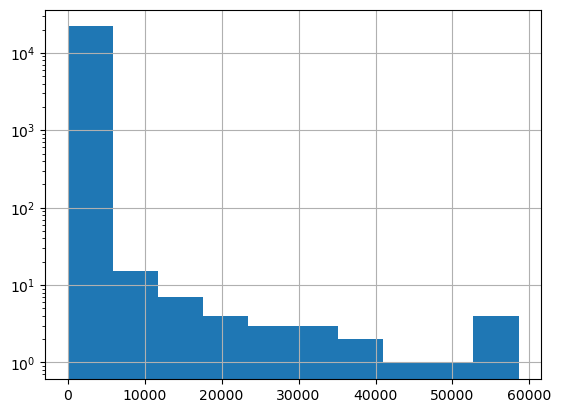

In [153]:
#Create a hits of votes distribution (log = True, becouse data strongly shifted to the left)
dfvotes.value_counts().hist(log=True)

In [198]:
# 10% and 90% percentiles
dfvotes.quantile([.1,.9]) #looks like percentiles can't provide numbers useful for filtering films becouse of the offset

0.1      7.0
0.9    477.0
Name: numVotes, dtype: float64

In [156]:
#Lets take a look deeper into the distribution

#based on the hist above let's divide series into 2 parts <50K and > 50K num votes

dfvotes_under_50 = dfvotes[dfvotes <= 50000]

dfvotes_above_50 = dfvotes[dfvotes > 50000]

Text(0, 0.5, 'count')

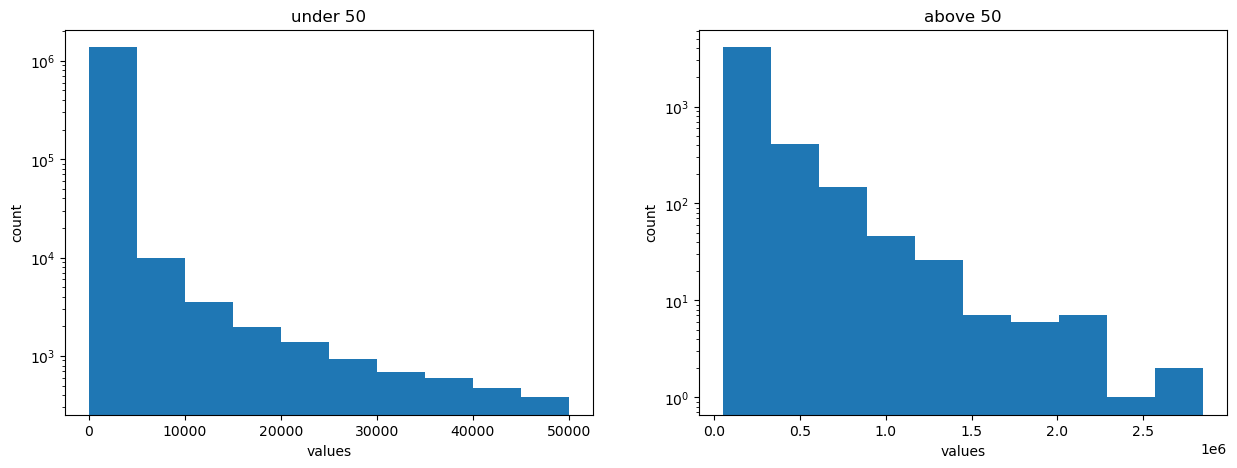

In [206]:
#Visualition of the divided series
fig, axs = plt.subplots(1, 2, figsize=(15, 5))

# votes distr under 50K
axs[0].hist(dfvotes_under_50,log=True)
axs[0].set_title('under 50')
axs[0].set_xlabel('values')
axs[0].set_ylabel('count')

# votes distr above 50K
axs[1].hist(dfvotes_above_50,log=True)
axs[1].set_title('above 50')
axs[1].set_xlabel('values')
axs[1].set_ylabel('count')

In [207]:
# lets take a look into numbers

#dividing series by bins
bins = 10 
dfvotes_under_50_binned = pd.cut(dfvotes_under_50, bins=bins).value_counts().sort_index()
dfvotes_above_50_binned = pd.cut(dfvotes_above_50, bins=bins).value_counts().sort_index()

#concat series and show
dfvotes_binned_total = pd.concat([dfvotes_under_50_binned,dfvotes_above_50_binned])
dfvotes_binned_total

numVotes
(-44.993, 5004.3]         1371751
(5004.3, 10003.6]            9908
(10003.6, 15002.9]           3553
(15002.9, 20002.2]           1955
(20002.2, 25001.5]           1373
(25001.5, 30000.8]            926
(30000.8, 35000.1]            695
(35000.1, 39999.4]            602
(39999.4, 44998.7]            476
(44998.7, 49998.0]            381
(47212.201, 329991.9]        4105
(329991.9, 609971.8]          413
(609971.8, 889951.7]          149
(889951.7, 1169931.6]          46
(1169931.6, 1449911.5]         26
(1449911.5, 1729891.4]          7
(1729891.4, 2009871.3]          6
(2009871.3, 2289851.2]          7
(2289851.2, 2569831.1]          1
(2569831.1, 2849811.0]          2
Name: count, dtype: int64

In [224]:
#Set up low and high votes limits based on visual analysis

#for the high limit lets choose the 9th rounded bin start point
high_limit = 330000

#for the low limit lets choose the 1st rounded bin end point
low_limit = 5000

#then let's calculate the final distribution
low_limit_films_count = (dfvotes <= low_limit).sum()
medium_limit_films_count = ((dfvotes > low_limit) & (dfvotes <= high_limit)).sum()
high_limit_films_count = (dfvotes > high_limit).sum()

print('Count of films with low num votes: '  + str(low_limit_films_count))
print('Count of films with medium num votes: ' + str(medium_limit_films_count))
print('Count of films with high num votes: ' + str(high_limit_films_count))

Count of films with low num votes: 1371737
Count of films with medium num votes: 23988
Count of films with high num votes: 657


# title_principals.tsv

In [87]:
dfprincipals = pd.read_csv('imdb_database_202401/title_principals.tsv',delimiter = '\t')

In [88]:
dfprincipals.head()

,tconst,ordering,nconst,category,job,characters
0,tt0000001,1,nm1588970,self,\N,"[""Self""]"
1,tt0000001,2,nm0005690,director,\N,\N
2,tt0000001,3,nm0374658,cinematographer,director of photography,\N
3,tt0000002,1,nm0721526,director,\N,\N
4,tt0000002,2,nm1335271,composer,\N,\N


In [92]:
#calculate min & max length of nconst to check constancy
dfprincipals['nconstlen'] = dfprincipals['nconst'].apply(lambda x: len(x))
dir_len_min = dfprincipals['nconstlen'].min()
dir_len_max = dfprincipals['nconstlen'].max()
print('min: ' + str(dir_len_min))
print('min: ' + str(dir_len_max))

min: 9
min: 10


In [94]:
#show category values
dfprincipals['category'].unique()

array(['self', 'director', 'cinematographer', 'composer', 'producer',
       'editor', 'actor', 'actress', 'writer', 'production_designer',
       'archive_footage', 'archive_sound'], dtype=object)